In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = '/data'
zipdata = np.loadtxt("data/ziptrain.csv")

In [6]:
zipdata.shape

(7291, 257)

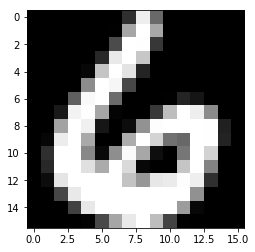

In [10]:
plt.imshow(zipdata[0,1:].reshape(16,16), "gray")

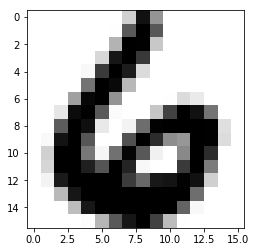

In [13]:
plt.imshow(-zipdata[0,1:].reshape(16,16), "gray")

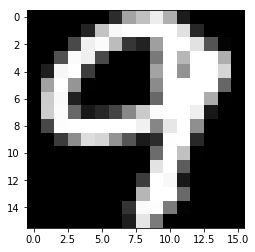

In [25]:
plt.imshow(zipdata[1000,1:].reshape(16,16), "gray")

In [31]:
zipdata[0,0] == 6

True

In [33]:
print(zipdata)

[[ 6.    -1.    -1.    ... -1.    -1.    -1.   ]
 [ 5.    -1.    -1.    ... -0.671 -0.828 -1.   ]
 [ 4.    -1.    -1.    ... -1.    -1.    -1.   ]
 ...
 [ 3.    -1.    -1.    ... -1.    -1.    -1.   ]
 [ 0.    -1.    -1.    ... -1.    -1.    -1.   ]
 [ 1.    -1.    -1.    ... -1.    -1.    -1.   ]]


In [36]:
zipdata3 = zipdata[zipdata[:,0] == 3]
zipdata3.shape

(658, 257)

In [40]:
np.random.seed(1)
random3 = np.random.choice(range(len(zipdata3)), size=20,replace=False)
print(random3)

[496 602 655 314 245 519  47 359 248  23  92 257 364 474  85 455 373 574
 525 247]


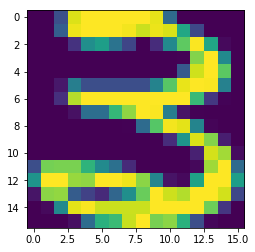

In [44]:
zipdata3stack = zipdata3[random3[0],1:].reshape(16,16)
plt.imshow(zipdata3stack)

(-0.5, 2143.5, 15.5, -0.5)

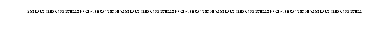

In [51]:
for i in range(1,len(random3)):
    zipdata3stack = np.hstack((zipdata3stack, zipdata3[random3[i],1:].reshape(16,16)))
    
plt.imshow(-zipdata3stack,"gray")
plt.axis("off")

In [54]:
# Create a subset of 8's and create a dataset

zipdata8 = zipdata[zipdata[:,0] == 8]
zipdata8.shape

(542, 257)

In [58]:
zipdata38 = np.vstack([zipdata3,zipdata8])
zipdata38.shape

(1200, 257)

In [60]:
print(zipdata38)

[[ 3.    -1.    -1.    ... -0.883 -1.    -1.   ]
 [ 3.    -1.    -1.    ... -1.    -1.    -1.   ]
 [ 3.    -1.    -1.    ... -0.526 -1.    -1.   ]
 ...
 [ 8.    -1.    -1.    ... -1.    -1.    -1.   ]
 [ 8.    -1.    -1.    ... -1.    -1.    -1.   ]
 [ 8.    -1.    -1.    ... -1.    -1.    -1.   ]]


In [64]:
# PCA principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# remove the image label
pca.fit(zipdata38[:,1:])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [68]:
Z = pca.transform(zipdata38[:,1:])
Z.shape
pd.DataFrame(Z).head()

,0,1
0,5.463958,-1.722154
1,1.987642,-3.603625
2,4.849472,-0.037323
3,4.913738,-2.366882
4,1.223261,-5.873590


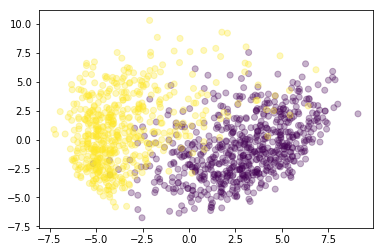

In [71]:
plt.scatter(Z[:,0], Z[:,1], c=zipdata38[:,0],alpha=.3)

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
predictors = Z
outcome = (zipdata38[:,0] > 4)*1
lr.fit(predictors,outcome)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
print(lr.intercept_, lr.coef_)

0.4516666666666666 [-0.1010817   0.04744051]


(-10, 10)

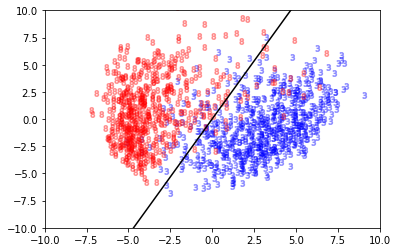

In [95]:
plt.scatter(Z[zipdata38[:,0]==3,0], Z[zipdata38[:,0]==3,1], marker='$3$', color='blue', alpha=.3)
plt.scatter(Z[zipdata38[:,0]==8,0], Z[zipdata38[:,0]==8,1], marker='$8$', color='red', alpha=.3)

pred = np.linspace(start=-10,stop=10,num =100)

plt.plot(pred, -(lr.coef_[0]/lr.coef_[1])*pred, "-k")
plt.xlim([-10,10])
plt.ylim([-10,10])

In [96]:
# PCR Pricipal component regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
path='data/'
filename = path+'Auto.csv'
auto = pd.read_csv(filename,na_values=['?'], na_filter=True)
print(auto.shape)
auto = auto.dropna() #remove th NA
print(auto.shape)

(397, 9)
(392, 9)


In [103]:
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = auto['mpg']

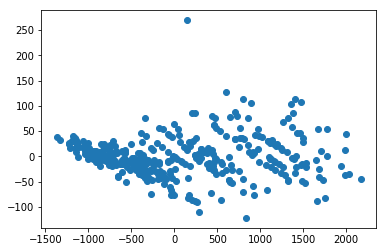

In [117]:
# Trying to scale here but it didn't work (REVIEW)
from sklearn.preprocessing import scale
X_std = scale(X.values)
pd.DataFrame(X_std)
pca_std= PCA(n_components=2)
pca_std.fit(X_std) #transform to numpy array
Z = pca.transform(X) #using the same number of components as the last example (2 components)
plt.scatter(Z[:,0],Z[:,1])


In [110]:
#pd.DataFrame(Z)
